In [104]:
] activate ../../Acceleration

 Activating environment at `~/Desktop/Code/Acceleration/Acceleration/Project.toml`


In [105]:
using Acceleration

n = 1000; # number of samples
d = 100;    # number of features
selected_labels = [3,4,0,1,2]; 

data, labels = load_dataset("FashionMNIST",selected_labels,n,d);  # load data set
λ = 1;    # regularizer consant
f,∇f,∇ϕ_cjg,σ,L,μ  = svm_setup(data,labels,λ); # obtan the ML model functions 

┌ Info: Loading dataset FashionMNIST with 60000 samples and 784 features
└ @ Acceleration /Users/victor/Desktop/Code/Acceleration/Acceleration/src/datasets.jl:26


In [111]:
x_ini = zeros(d+1)
k = 1000;
L = 1000;
μ = 1;

@time x_out1 = MD(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out2 = GD(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out3 = ufom(f,∇f,∇ϕ_cjg,x_ini,σ,L,0,k);
@time x_out4 = AMD_plus(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);

  4.355129 seconds (14.79 M allocations: 12.253 GiB, 48.62% gc time)
  4.373463 seconds (14.79 M allocations: 12.253 GiB, 49.13% gc time)
  4.644871 seconds (14.87 M allocations: 12.319 GiB, 49.41% gc time)
  4.834344 seconds (14.82 M allocations: 12.278 GiB, 49.50% gc time)


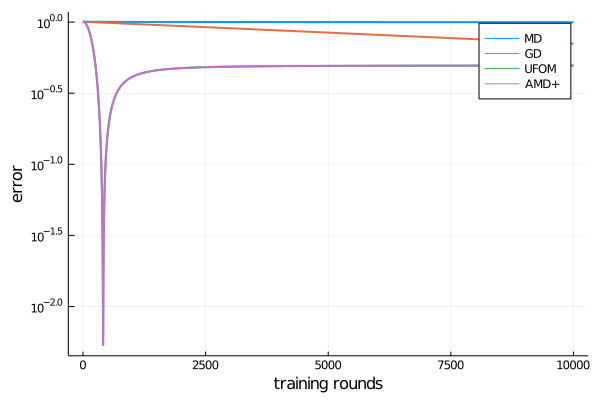

In [112]:
using Plots

x_opt = svm_compute_optval(λ,data,labels)

p1 = sqrt.(sum((x_out1 .- x_opt).^2, dims=1)');
p2 = sqrt.(sum((x_out2 .- x_opt).^2, dims=1)');
p3 = sqrt.(sum((x_out3 .- x_opt).^2, dims=1)');
p4 = sqrt.(sum((x_out4 .- x_opt).^2, dims=1)');

fig = plot(hcat(p1,p2,p3,p4),yaxis=:log, linewidth=2, 
label = ["MD" "GD" "UFOM" "AMD+"], xlabel = "training rounds", ylabel = "error")

In [ ]:
plot(fig, legend=:topleft, label = ["Dress" "Coat" "Opt. classifier" "AMD classifier"])

In [ ]:
using MLDatasets

In [ ]:
FashionMNIST.classnames()


In [72]:
σ

1

In [ ]:
using Acceleration

n = 1000; # number of samples
d = 2;    # number of features
selected_labels = [3,4];

data, labels = load_dataset("FashionMNIST",selected_labels,n,d);  # load data set
svm = svm_setup(data,labels,1); # obtain the ML model functions 

x_ini = zeros(d+1) # set initial point
k = 10000; # set maximum number of iterations
accelerated_mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
